<a href="https://colab.research.google.com/github/hosseinmou3avi/work-with-data/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


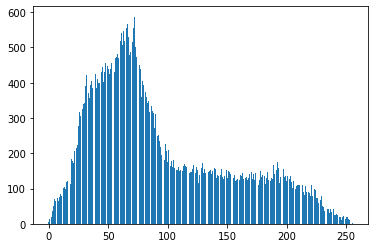

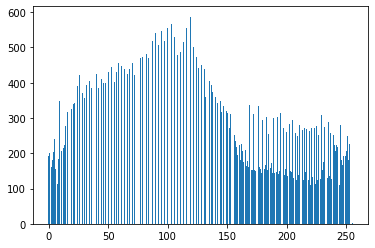

In [6]:


'''
# Producing Histogram
img = Image.open(filename)
imgray = img.convert(mode='L')
img_array = np.asarray(imgray)
hist, bin_edge = np.histogram(img_array.ravel(),bins=255)
fig = plt.figure()
plt.bar(x=np.arange(len(hist)),height=hist)
plt.show()
'''
%matplotlib inline
filename = '/content/drive/MyDrive/پردازش تصویر/ocean.jpg'

img = Image.open(filename)

# convert to grayscale
imgray = img.convert(mode='L')
img_array = np.asarray(imgray)


#negative_img = 255 - img_array
#img_array = negative_img
#eq_img = Image.fromarray(negative_img, mode='L')
#eq_img.save('negative.png')


# Perform Histogram Equalization
'''
STEP 1: Normalized Cumulative Histogram
'''
histogram_array = np.bincount(img_array.flatten(),minlength=256)
fig = plt.figure()
plt.bar(x=np.arange(len(histogram_array)),height=histogram_array)
plt.show()
#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

'''
STEP 2: pixel mapping lookup table
'''
transform_map = np.floor(255*chistogram_array).astype(np.uint8)
'''
STEP 3: Transformation
'''
image_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in image_list]

eq_img_array = np.reshape(np.asarray(eq_img_list),img_array.shape)

histogram_eq_img_array = np.bincount(eq_img_array.flatten(),minlength=256)

fig = plt.figure()
plt.bar(x=np.arange(len(histogram_eq_img_array)),height=histogram_eq_img_array)
plt.show()

eq_img = Image.fromarray(eq_img_array, mode='L')
eq_img.save('enhanced_contrast_3.png')



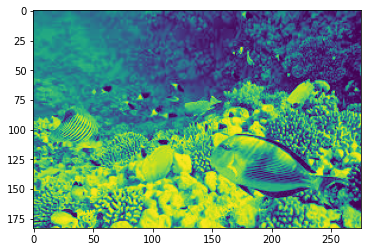

In [7]:
%matplotlib inline


fig = plt.figure()

plt.imshow(eq_img)